<a href="https://colab.research.google.com/github/SilviaMaharjan/Sem3PythonWorkshops/blob/main/Silvia_Maharjan_2408228_ws2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem 1 - Data Read, Write and Inspect:
import pandas as pd

bank_df = pd.read_csv('/content/drive/MyDrive/year2/Datasets/bank .csv')

print(bank_df.info())

object_columns = bank_df.select_dtypes(include=['object']).columns
print("\nColumns with dtype='object':\n", object_columns)

for col in object_columns:
    print(f"\nUnique values in column '{col}':", bank_df[col].unique())

null_values = bank_df.isnull().sum()
print("\nNumber of null values in each column:\n", null_values)

banknumericdata = bank_df.drop(columns=object_columns)

banknumericdata.to_csv('banknumericdata .csv', index=False)
print("\nNumeric data saved to 'banknumericdata.csv'.")

banknumericdata = pd.read_csv('banknumericdata .csv')
summary_stats = banknumericdata.describe()
print("\nSummary statistics of numeric data:\n", summary_stats)

Numeric data saved to 'banknumericdata.csv'.                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.00000

In [ ]:
import pandas as pd

medical_df = pd.read_csv('/content/drive/MyDrive/year2/Datasets/medical_students_dataset.csv')

print("Initial Missing Values Per Column:")
print(medical_df.isnull().sum())

for column in medical_df.columns:
    if medical_df[column].isnull().sum() > 0:
        if medical_df[column].dtype == 'object':
            medical_df[column] = medical_df[column].fillna(medical_df[column].mode()[0])
        else:
            medical_df[column] = medical_df[column].fillna(medical_df[column].median())

print("\nMissing Values After Handling:")
print(medical_df.isnull().sum())

print(f"\nNumber of duplicate rows: {medical_df.duplicated().sum()}")
medical_df = medical_df.drop_duplicates()
print(f"Number of duplicate rows after removal: {medical_df.duplicated().sum()}")

print("\nCleaned dataset saved successfully.")


Initial Missing Values Per Column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

Missing Values After Handling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Number of duplicate rows: 12879
Number of duplicate rows after removal: 0

Cleaned dataset saved successfully.


                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  
Mean Fare: 84.15
Median Fare: 60.29
Maximum Fare: 512.33
Minimum Fare: 0.00
Number of null values in 'Age': 30
Number of null values in 'Age' after dropping: 0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

    

<ipython-input-7-6845c05a0769>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='coolwarm')


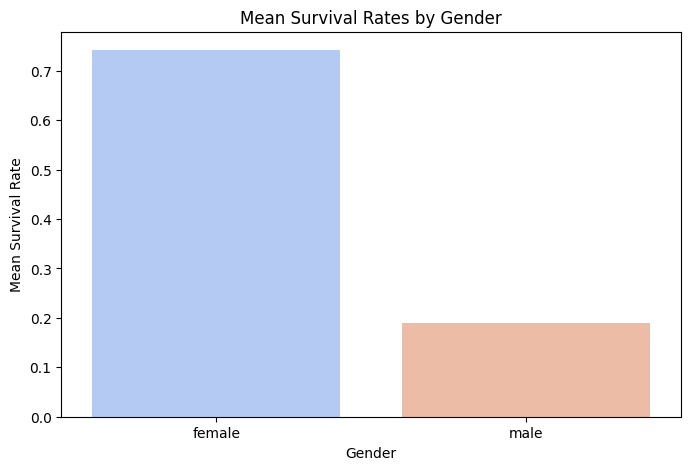

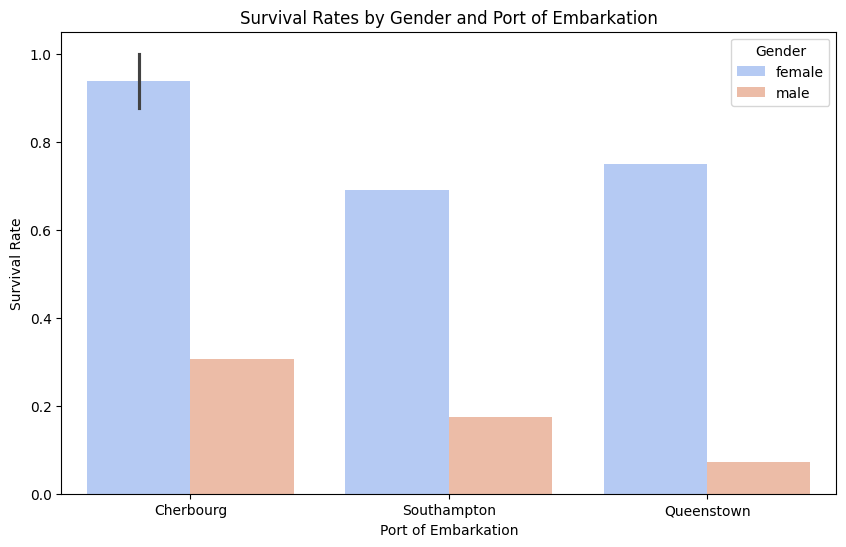

In [ ]:
# 3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
# Problem 1

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

titanic_df = pd.read_csv('/content/drive/MyDrive/year2/Datasets/Titanic-Dataset.csv')

# Subset for specific columns
subset_df = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter for first-class passengers
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Display the first few rows of the filtered dataset
print(first_class_df.head())

# Calculate statistics for the 'Fare' column
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

# Print the results
print(f"Mean Fare: {fare_mean:.2f}")
print(f"Median Fare: {fare_median:.2f}")
print(f"Maximum Fare: {fare_max:.2f}")
print(f"Minimum Fare: {fare_min:.2f}")

# Problem 2

# Check null values in 'Age' column
age_null_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age': {age_null_count}")

# Drop rows with null values in 'Age'
first_class_df = first_class_df.dropna(subset=['Age'])

# Verify null values are removed
print(f"Number of null values in 'Age' after dropping: {first_class_df['Age'].isnull().sum()}")


# Problem 3

# One-hot encode the 'Embarked' column
embarked_encoded = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# Add the new columns to the original DataFrame
titanic_df = pd.concat([titanic_df, embarked_encoded], axis=1)

# Drop the original 'Embarked' column
titanic_df = titanic_df.drop(columns=['Embarked'])

# Print the first few rows to verify changes
print(titanic_df.head())


# Problem 4

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean survival rates by gender
survival_rates = titanic_df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(survival_rates)

# Create a visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='coolwarm')
plt.title('Mean Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

# Problem 5 - Breakdown by Port of Embarkation

# Grouping by Sex and Embarked columns to calculate survival rates
survival_by_gender_embarkation = titanic_df.groupby(['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])['Survived'].mean().reset_index()

# Replace One-Hot Encoded Columns with Port Names
survival_by_gender_embarkation['Embarked'] = survival_by_gender_embarkation[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1).replace({
    'Embarked_C': 'Cherbourg',
    'Embarked_Q': 'Queenstown',
    'Embarked_S': 'Southampton'
})

# Drop extra columns to tidy up the DataFrame
survival_by_gender_embarkation = survival_by_gender_embarkation.drop(columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])

# Visualization: Grouped Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Embarked', y='Survived', hue='Sex',
    data=survival_by_gender_embarkation, palette='coolwarm'
)
plt.title('Survival Rates by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()
